In [ ]:
import sym_sinekan

import netket as nk
import numpy as np
import matplotlib.pyplot as plt
import optax

In [ ]:
m2s = []
h_values = np.arange(0, 2.1, .1)
for h in h_values:
    # Define system size
    L = 20  # Number of spins
    J = -1
    batch_size = 1024

    # Define the 1D spin chain with periodic boundary conditions (PBC)
    g = nk.graph.Hypercube(length=L, n_dim=1, pbc=True)
    # Define the Hilbert space
    hi = nk.hilbert.Spin(s=0.5, N=g.n_nodes)
    ham = nk.operator.Ising(h=h, hilbert=hi, J=J, graph=g)
    # Initialize m^2 storage
    ma = sym_sinekan.SymmetricSineKAN1D(layers_hidden = (64,64,1), grid_size=8)
    vs = nk.vqs.MCState(nk.sampler.MetropolisLocal(hi, n_chains = batch_size), ma, n_samples = batch_size, chunk_size = batch_size, seed=42)

    n_epochs = 10000

    scheduler = optax.schedules.linear_schedule(1e-4, 1e-6, n_epochs//2, n_epochs//2)
    opt = nk.optimizer.Adam(learning_rate=scheduler)  # Use Adam for stable optimization
    gs = nk.VMC(ham, optimizer=opt, variational_state=vs)
    gs.run(n_iter= n_epochs, out="ising_SymSineKAN")  # Training uses 400000 samples
    corr = sum([nk.operator.spin.sigmaz(hi, i) * nk.operator.spin.sigmaz(hi, (i + L // 2) % L) for i in range(L)])
    m2 = vs.expect(corr).mean.real / L  # Normalize by L
    m2s.append(m2)
    E = vs.expect(ham)
    print(E)
    print(m2)

  0%|          | 0/10000 [00:00<?, ?it/s]

-2.000e+01 ± nan [σ²=0.000e+00]
1.0


  0%|          | 0/10000 [00:00<?, ?it/s]

-20.049981 ± 0.000034 [σ²=0.000001]
0.997265625


  0%|          | 0/10000 [00:00<?, ?it/s]

-20.20002 ± 0.00016 [σ²=0.00003]
0.989453125


  0%|          | 0/10000 [00:00<?, ?it/s]

-20.45246 ± 0.00049 [σ²=0.00025]
0.9767578125


  0%|          | 0/10000 [00:00<?, ?it/s]

-20.8085 ± 0.0011 [σ²=0.0012]
0.95703125


  0%|          | 0/10000 [00:00<?, ?it/s]

-21.2707 ± 0.0014 [σ²=0.0020]
0.9318359375


  0%|          | 0/10000 [00:00<?, ?it/s]

-21.8457 ± 0.0014 [σ²=0.0021]
0.89765625


  0%|          | 0/10000 [00:00<?, ?it/s]

-22.5341 ± 0.0025 [σ²=0.0066]
0.8453125


  0%|          | 0/10000 [00:00<?, ?it/s]

-23.3538 ± 0.0022 [σ²=0.0051]
0.7783203125


  0%|          | 0/10000 [00:00<?, ?it/s]

-24.3184 ± 0.0046 [σ²=0.0218]
0.6490234375


  0%|          | 0/10000 [00:00<?, ?it/s]

-25.4861 ± 0.0031 [σ²=0.0096]
0.404296875


  0%|          | 0/10000 [00:00<?, ?it/s]

-26.8658 ± 0.0028 [σ²=0.0081]
0.205859375


  0%|          | 0/10000 [00:00<?, ?it/s]

-28.3947 ± 0.0024 [σ²=0.0061]
0.0728515625


  0%|          | 0/10000 [00:00<?, ?it/s]

-30.0191 ± 0.0024 [σ²=0.0058]
0.0369140625


  0%|          | 0/10000 [00:00<?, ?it/s]

-31.7046 ± 0.0022 [σ²=0.0048]
0.0119140625


  0%|          | 0/10000 [00:00<?, ?it/s]

-33.4402 ± 0.0021 [σ²=0.0045]
0.00234375


  0%|          | 0/10000 [00:00<?, ?it/s]

-35.2100 ± 0.0021 [σ²=0.0044]
0.00078125


  0%|          | 0/10000 [00:00<?, ?it/s]

-37.0130 ± 0.0019 [σ²=0.0037]
-0.003125


  0%|          | 0/10000 [00:00<?, ?it/s]

-38.8367 ± 0.0018 [σ²=0.0033]
-0.0197265625


  0%|          | 0/10000 [00:00<?, ?it/s]

-40.6799 ± 0.0018 [σ²=0.0032]
-0.0046875


  0%|          | 0/10000 [00:00<?, ?it/s]

-42.5416 ± 0.0017 [σ²=0.0031]
0.00546875


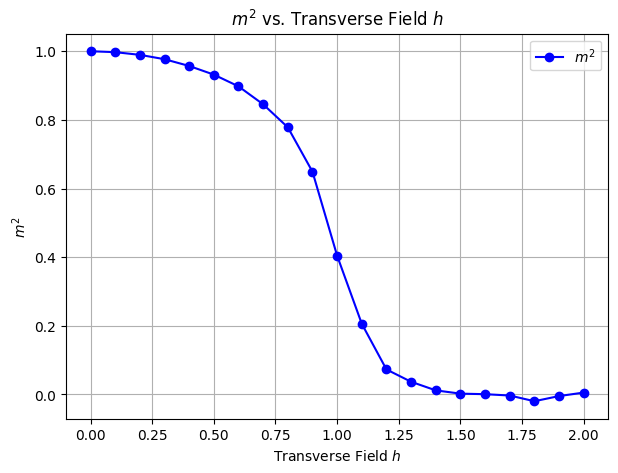

In [ ]:
# Plot results
plt.figure(figsize=(7, 5))
plt.plot(h_values, m2s, marker="o", linestyle="-", color="b", label=r"$m^2$")
plt.xlabel(r"Transverse Field $h$")
plt.ylabel(r"$m^2$")
plt.title(r"$m^2$ vs. Transverse Field $h$")
plt.legend()
plt.grid()
plt.show()

In [ ]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 8

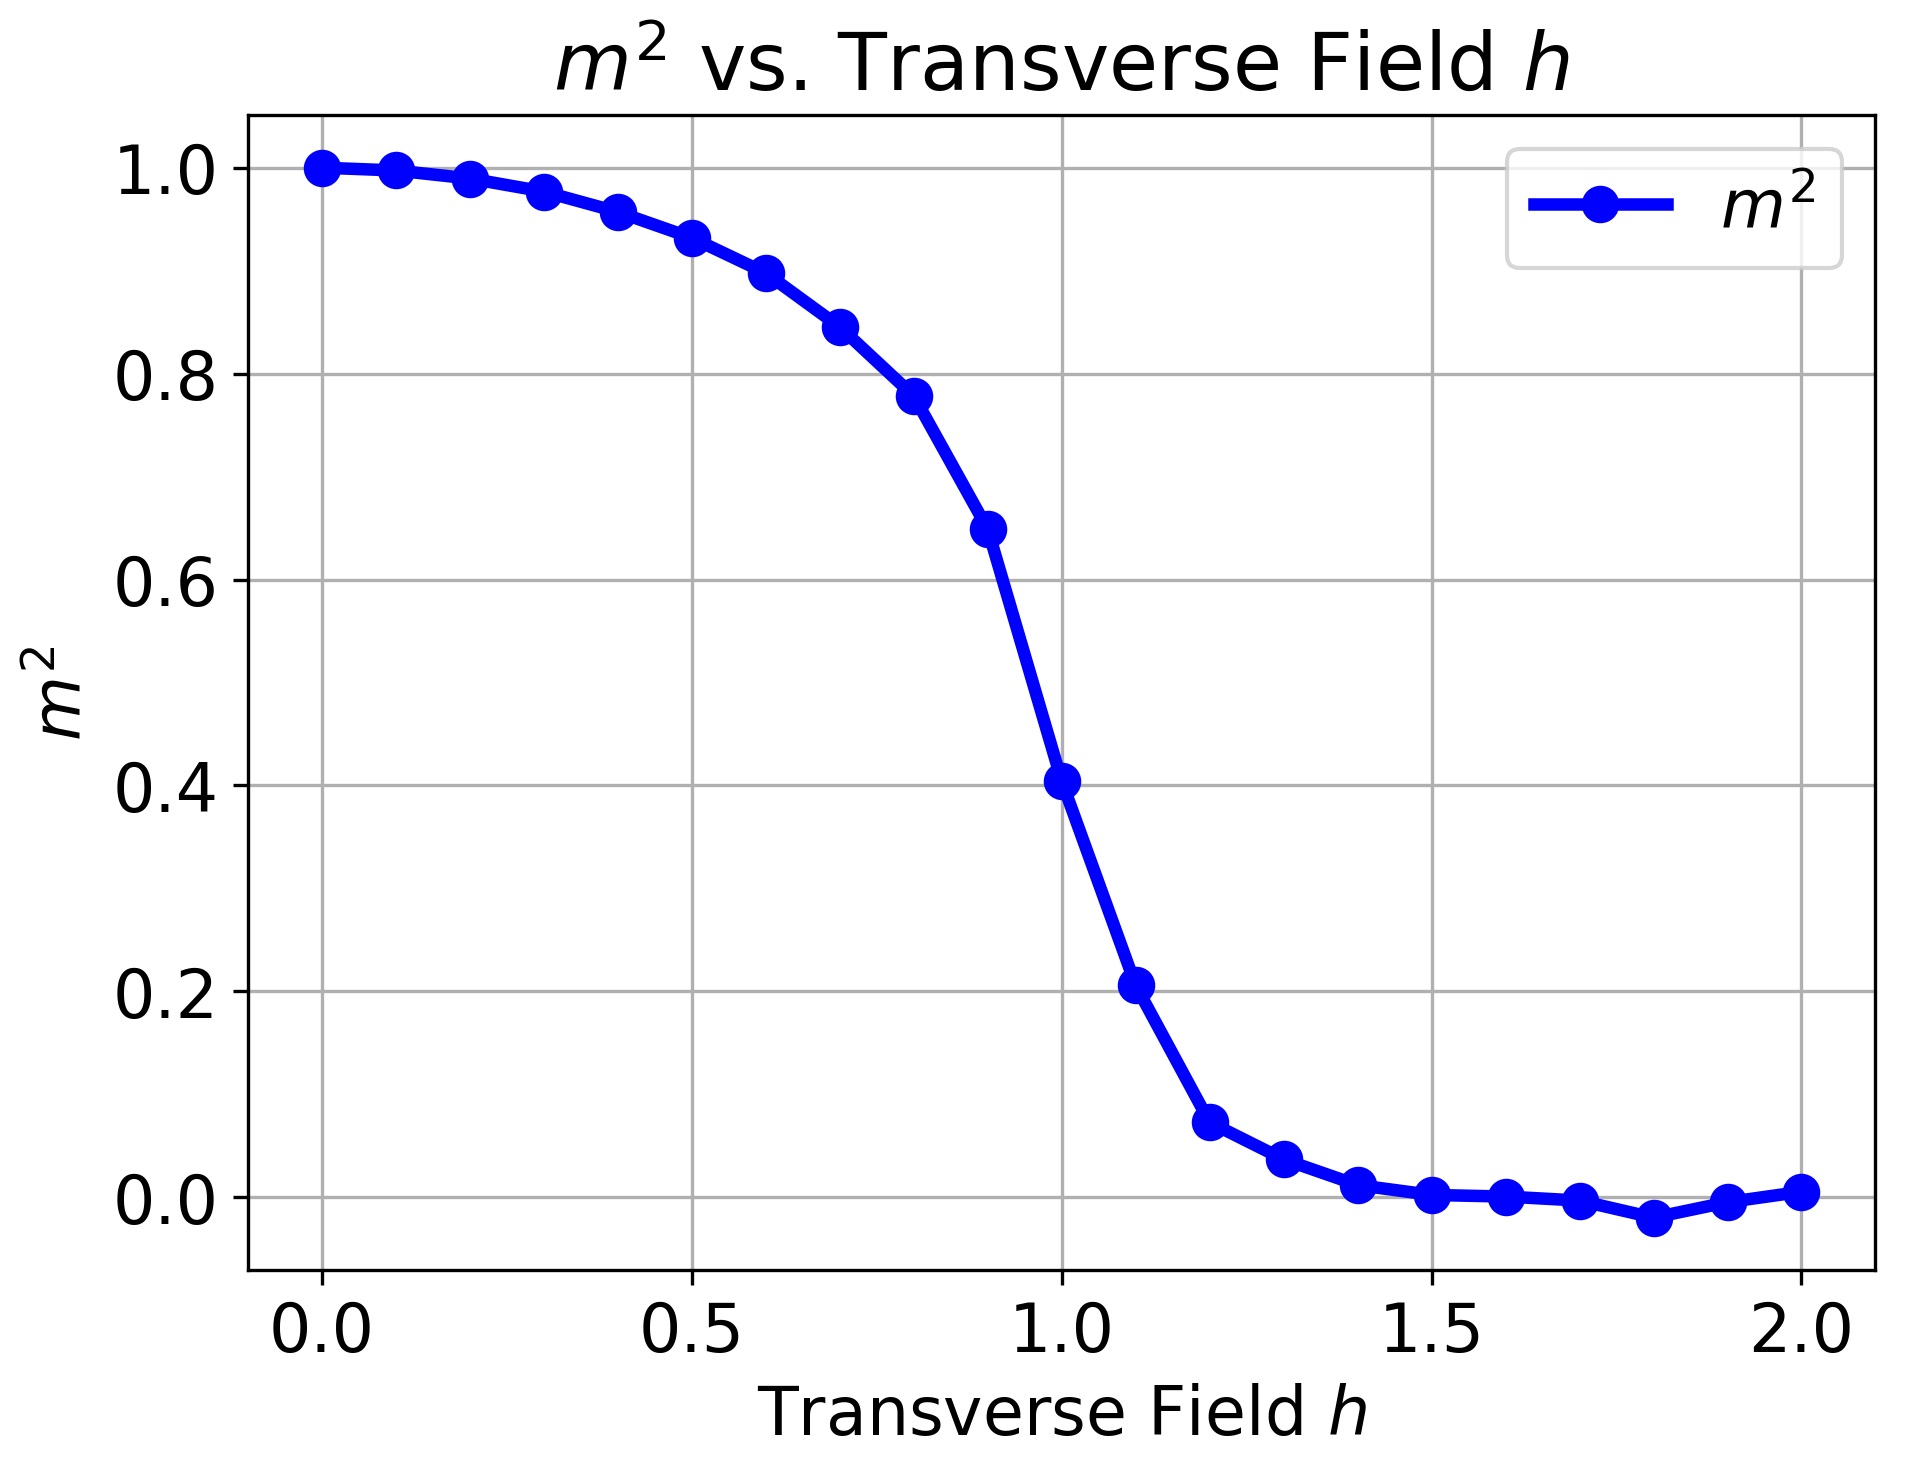

In [ ]:
# Plot results
plt.figure(figsize=(7, 5))
plt.plot(h_values, m2s, marker="o", linestyle="-", color="b", label=r"$m^2$")
plt.xlabel(r"Transverse Field $h$")
plt.ylabel(r"$m^2$")
plt.title(r"$m^2$ vs. Transverse Field $h$")
plt.legend()
plt.grid()
plt.show()